# Movie Recommendation System using Movielens dataset

### Group Members:
        Abhishek Kumar
        Aishwarya Godavari
        Darshana Borade

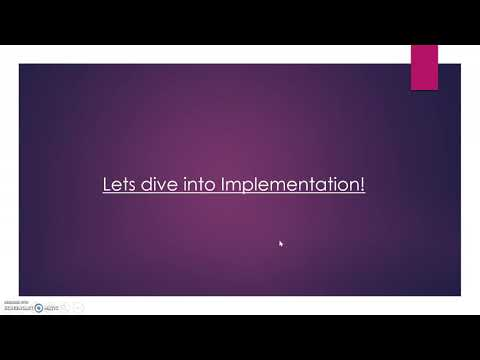

In [1]:
#Video explaination of the project
from IPython.display import YouTubeVideo
YouTubeVideo('O9D1drKZ0v0')

# Abstract

Recommendation systems are systems that help users discover items which they may like. It takes into consideration user’s current data and predicts future preferences to recommend top items. There is high volume of data on the internet and User has too much to choose from, in order to narrow down the options based on historical data of the User, recommendation systems are doing great job and are backbones of the E-commerce industry. 
Knowing "What customers are most likely to buy in future" is key to personalized marketing for most of the businesses. Understanding customers past purchase behavior or customer demographics could be key to make future buy predictions. But how to use the customer behavior data, depends on many different algorithms or techniques. Some alogorithms may use demographic information to make this predictions. But most of the times, the orgranizations may not have these kind of information about customers at all. All that organization will have are what customers bought in past or if the liked it or not.

Recommendation systems use techniques to leverage these information and make recommendation, which has been proved to be very successful. For examples, Amazon.com's most popular feature of "Customers who bought this also buys this"

Some of the key techiques that recommendation systems use are
     
        - Association Rules mining
        - Collaborative Filtering
        - Matrix Factorization
        - Page Rank Algorithm



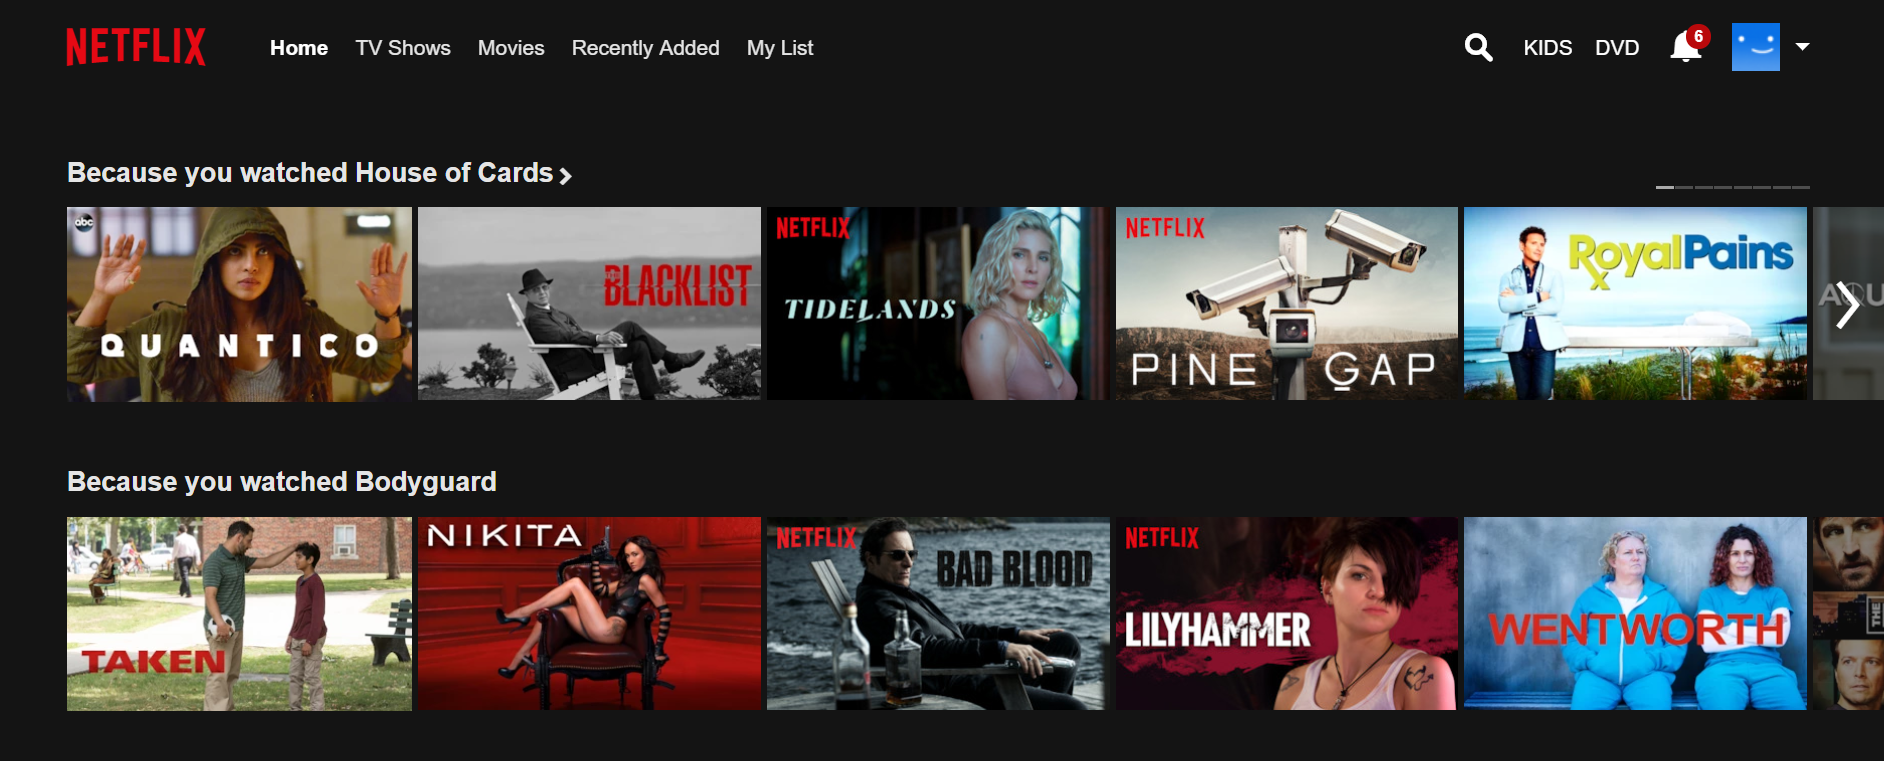

In [1]:
from IPython.display import Image
Image(filename='netflix.png')

# Introduction
In out implementation of recommendation system we are trying find users who have watched similar movies and recommend other movies that this particular user has watches. Since recommendation based on only users introduces 'Cold start problem', we are also implementating 'Item based filtering' in which we will recommend movies with order of highest to lowest correlation index to a particular movie.

# Methodology

In our approach of recommendation system we are using collaborative filtering. This systems matches people with similar interests and then matches their interests to give recommendations.

In our system we are going to use two approaches:
 1. User based collaborative filtering
 2. Item based collaborative filtering

In [60]:
import pandas as pd
import numpy as np

# Data acquisition and analysis


MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
    * Simple demographic info for the users (age, gender, occupation, zip)

We have used two files for our implementation.

 1. u.data : It has 100000 ratings by 943 users on 1682 items. Each user has rated at least 20 movies.
             Users and items are numbered consecutively from 1. The data is randomly ordered.
             This is a tab separated list of user id | item id | rating | timestamp.
  
 2. u.item : This file contains information about movies. 
             It has a tab seperated list of following columns:
             movie id | movie title | release date | video release date |IMDb URL | unknown | Action | Adventure|Animation |
             Children's | Comedy | Crime | Documentary | Drama | Fantasy |
             Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
             Thriller | War | Western |
             The last 19 fields are the genres. 
             A 1 indicates the movie is of that genre, a 0 indicates it is not.
             Movies can be in several genres at once.
             The movie ids are the ones used in the u.data data set.
	         


### Loading Ratings dataset

In [61]:
movie_rating_df = pd.read_csv( "u.data", delimiter = "\t", header = None )

In [62]:
movie_rating_df.head( 10 )

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


### Naming the columns

In [63]:
movie_rating_df.columns = ["userid", "movieid", "rating", "timestamp"]

In [64]:
movie_rating_df.head( 10 )

,userid,movieid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


### Finding the Number of unique users

In [65]:
len( movie_rating_df.userid.unique() )

943

### To find the Number of unique movies

In [66]:
len( movie_rating_df.movieid.unique() )

1682

### So a total of 1682 movies and 943 users data is available in the dataset. There is a column Timesstamp which is not relevant and hence wont help us in the analyisis. So Let's drop the timestamp column

In [67]:
movie_rating_df.drop( "timestamp", inplace = True, axis = 1 )

In [68]:
movie_rating_df.head( 10 )

,userid,movieid,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
5,298,474,4
6,115,265,2
7,253,465,5
8,305,451,3
9,6,86,3


### Loading Movies Data

In [69]:
movies_df = pd.read_csv( "u.item", delimiter = '\|', header = None )

C:\Users\Darshana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [70]:
movies_df = movies_df.iloc[:,:2]
movies_df.columns = ['movieid', 'title']

In [71]:
movies_df.head( 10 )

,movieid,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


# Implementation of recommendation system

### Finding Similarities among the Users

### Importing necessary libraries

In [72]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

### Create the pivot table

In [73]:
user_movies_df = movie_rating_df.pivot( index='userid', columns='movieid', values = "rating" ).reset_index(drop=True)

### If the user has not provided any ratings, we are going to Fill '0' for those

In [74]:
user_movies_df.fillna(0, inplace = True)

In [75]:
user_movies_df.shape

(943, 1682)

In [76]:
user_movies_df.iloc[10:20, 20:30]

movieid,21,22,23,24,25,26,27,28,29,30
10,0.0,4.0,0.0,3.0,3.0,0.0,0.0,5.0,3.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
12,3.0,4.0,5.0,1.0,1.0,0.0,3.0,5.0,2.0,0.0
13,0.0,3.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
15,0.0,5.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,5.0,4.0,0.0,3.0,4.0,0.0,3.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Calculate the distances
Based on what users have given ratings to different items, we can calculate the distances between them. Less the distance more similar they are.


Now, we can find similar users based the distance between user depending on how they have rated the movies. 

For calculating distances, many similarity coefficients can be calculated. Most widely used similarity coefficients are Euclidean, Cosine, Pearson Correlation etc.
We will use cosine distance here. Here we are insterested in similarity. That means higher the value more similar they are. But as the function gives us the distance, we will deduct it from 1.

In [77]:
user_sim = 1 - pairwise_distances( user_movies_df.as_matrix(), metric="cosine" )

C:\Users\Darshana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [78]:
user_sim_df = pd.DataFrame( user_sim )

In [79]:
user_sim_df[0:5]

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,1.000000,0.166931,0.047460,0.064358,0.378475,0.430239,0.440367,0.319072,0.078138,0.376544,...,0.369527,0.119482,0.274876,0.189705,0.197326,0.118095,0.314072,0.148617,0.179508,0.398175
1,0.166931,1.000000,0.110591,0.178121,0.072979,0.245843,0.107328,0.103344,0.161048,0.159862,...,0.156986,0.307942,0.358789,0.424046,0.319889,0.228583,0.226790,0.161485,0.172268,0.105798
2,0.047460,0.110591,1.000000,0.344151,0.021245,0.072415,0.066137,0.083060,0.061040,0.065151,...,0.031875,0.042753,0.163829,0.069038,0.124245,0.026271,0.161890,0.101243,0.133416,0.026556
3,0.064358,0.178121,0.344151,1.000000,0.031804,0.068044,0.091230,0.188060,0.101284,0.060859,...,0.052107,0.036784,0.133115,0.193471,0.146058,0.030138,0.196858,0.152041,0.170086,0.058752
4,0.378475,0.072979,0.021245,0.031804,1.000000,0.237286,0.373600,0.248930,0.056847,0.201427,...,0.338794,0.080580,0.094924,0.079779,0.148607,0.071459,0.239955,0.139595,0.152497,0.313941


### Who is similar to who?
### Users with highest similarity values can be treated as similar users.

In [80]:
user_sim_df.idxmax(axis=1)[0:5]

0    0
1    1
2    2
3    3
4    4
dtype: int64

The above results show that user are most similar to themselves. But this is not what we want. So, we will fill the diagonal of the matrix (which represent the relationship with self) with 0.

**Setting correlation with self to 0**

In [81]:
np.fill_diagonal( user_sim, 0 )

In [82]:
user_sim_df = pd.DataFrame( user_sim )

In [83]:
user_sim_df[0:5]

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,0.000000,0.166931,0.047460,0.064358,0.378475,0.430239,0.440367,0.319072,0.078138,0.376544,...,0.369527,0.119482,0.274876,0.189705,0.197326,0.118095,0.314072,0.148617,0.179508,0.398175
1,0.166931,0.000000,0.110591,0.178121,0.072979,0.245843,0.107328,0.103344,0.161048,0.159862,...,0.156986,0.307942,0.358789,0.424046,0.319889,0.228583,0.226790,0.161485,0.172268,0.105798
2,0.047460,0.110591,0.000000,0.344151,0.021245,0.072415,0.066137,0.083060,0.061040,0.065151,...,0.031875,0.042753,0.163829,0.069038,0.124245,0.026271,0.161890,0.101243,0.133416,0.026556
3,0.064358,0.178121,0.344151,0.000000,0.031804,0.068044,0.091230,0.188060,0.101284,0.060859,...,0.052107,0.036784,0.133115,0.193471,0.146058,0.030138,0.196858,0.152041,0.170086,0.058752
4,0.378475,0.072979,0.021245,0.031804,0.000000,0.237286,0.373600,0.248930,0.056847,0.201427,...,0.338794,0.080580,0.094924,0.079779,0.148607,0.071459,0.239955,0.139595,0.152497,0.313941


### Finding user similarities

In [84]:
user_sim_df.idxmax(axis=1).sample( 10, random_state = 10 )

544    756
309    246
448    893
628    537
284    413
572    693
225    866
567    311
75     176
726    496
dtype: int64

This shows which results are similar to each other. The actual user id will be the index number + 1. That means user 545 is similar to user 757 and so on and so forth.

**Movies similar users like or dislike**
* We can find the actual movie names and check if the similar users have rated them similarity or differently.

In [85]:
def get_user_similar_movies( user1, user2 ):
  common_movies = movie_rating_df[movie_rating_df.userid == user1].merge(movie_rating_df[movie_rating_df.userid == user2], on = "movieid", how = "inner" )

  return common_movies.merge( movies_df, on = 'movieid' )

**User 310 Vs. User 247**

In [86]:
get_user_similar_movies( 310, 247 )

,userid_x,movieid,rating_x,userid_y,rating_y,title
0,310,258,3,247,5,Contact (1997)
1,310,257,5,247,4,Men in Black (1997)
2,310,251,5,247,4,Shall We Dance? (1996)
3,310,1022,5,247,4,"Fast, Cheap & Out of Control (1997)"
4,310,222,3,247,3,Star Trek: First Contact (1996)
5,310,181,4,247,4,Return of the Jedi (1983)
6,310,50,5,247,5,Star Wars (1977)


**Challenges with User similarity**
The challenge with calculating user similarity is the user need to have some prior purchases and should have rated them. This recommendation technique does not work for new users. The system need to wait until the user make some purchases and rates them. Only then similar users can be found and recommendations can be made. This is called 'cold start problem'. This can be avoided by calculating item similarities based how users are buying these items and rates them together. Here the items are entities and users are dimensions.

**Finding Item Similarity**
Let's create a pivot table of Movies to Users The rows are movies and columns are users. And the values in the matrix are the rating for a specific movie by a specific user.

In [87]:
movie_rating_mat = movie_rating_df.pivot( index='movieid', columns='userid', values = "rating" ).reset_index(drop=True)

**Fill with 0, where users have not rated the movies**

In [88]:
movie_rating_mat.fillna( 0, inplace = True )

In [89]:
movie_rating_mat.shape

(1682, 943)

In [90]:
movie_rating_mat.head( 10 )

userid,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,2.0,5.0,3.0,4.0,4.0,...,0.0,0.0,4.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
8,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,4.0,...,0.0,1.0,4.0,5.0,3.0,5.0,3.0,0.0,0.0,3.0
9,3.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculating the item distances and similarities

In [91]:
movie_sim = 1 - pairwise_distances( movie_rating_mat.as_matrix(), metric="correlation" )

C:\Users\Darshana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [92]:
movie_sim.shape

(1682, 1682)

In [93]:
movie_sim_df = pd.DataFrame( movie_sim )

In [94]:
movie_sim_df.head( 10 )

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,1.000000,0.234595,0.193362,0.226213,0.128840,0.015113,0.347354,0.254490,0.209502,0.104655,...,0.018215,-0.029676,-0.029676,-0.029676,0.018215,-0.029676,-0.029676,-0.029676,0.034179,0.034179
1,0.234595,1.000000,0.190649,0.409044,0.240712,0.030062,0.220022,0.206020,0.077894,0.072906,...,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,0.071415,0.071415
2,0.193362,0.190649,1.000000,0.227849,0.141368,0.065347,0.258855,0.078636,0.146181,0.079608,...,-0.009764,-0.009764,-0.009764,-0.009764,0.023964,-0.009764,-0.009764,-0.009764,-0.009764,0.091421
3,0.226213,0.409044,0.227849,1.000000,0.237298,0.021878,0.295489,0.352800,0.229922,0.138220,...,-0.016619,-0.016619,0.088984,0.088984,0.025622,-0.016619,-0.016619,-0.016619,0.046743,0.067863
4,0.128840,0.240712,0.141368,0.237298,1.000000,-0.008594,0.205289,0.145866,0.142541,-0.033746,...,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,0.088618
5,0.015113,0.030062,0.065347,0.021878,-0.008594,1.000000,0.054415,0.012330,0.079619,0.166084,...,-0.005159,-0.005159,-0.005159,-0.005159,-0.005159,-0.005159,-0.005159,-0.005159,-0.005159,-0.005159
6,0.347354,0.220022,0.258855,0.295489,0.205289,0.054415,1.000000,0.190670,0.286572,0.178505,...,-0.026036,0.039920,-0.026036,-0.026036,0.039920,-0.026036,-0.026036,-0.026036,0.039920,0.039920
7,0.254490,0.206020,0.078636,0.352800,0.145866,0.012330,0.190670,1.000000,0.229331,0.152679,...,-0.017230,0.075617,0.057047,0.057047,0.075617,-0.017230,-0.017230,-0.017230,0.075617,-0.017230
8,0.209502,0.077894,0.146181,0.229922,0.142541,0.079619,0.286572,0.229331,1.000000,0.158373,...,-0.021125,-0.021125,0.047273,0.047273,0.064372,-0.021125,-0.021125,-0.021125,0.047273,0.064372
9,0.104655,0.072906,0.079608,0.138220,-0.033746,0.166084,0.178505,0.152679,0.158373,1.000000,...,-0.010138,-0.010138,0.073967,0.073967,-0.010138,-0.010138,-0.010138,-0.010138,-0.010138,-0.010138


### Finding similar movies to "Toy Story"

In [95]:
movies_df['similarity'] = movie_sim_df.iloc[0]
movies_df.columns = ['movieid', 'title', 'similarity']

In [96]:
movies_df.head( 10 )

,movieid,title,similarity
0,1,Toy Story (1995),1.000000
1,2,GoldenEye (1995),0.234595
2,3,Four Rooms (1995),0.193362
3,4,Get Shorty (1995),0.226213
4,5,Copycat (1995),0.128840
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,0.015113
6,7,Twelve Monkeys (1995),0.347354
7,8,Babe (1995),0.254490
8,9,Dead Man Walking (1995),0.209502
9,10,Richard III (1995),0.104655


In [97]:
movies_df.sort_values(by='similarity', ascending=False)[1:10]

,movieid,title,similarity
49,50,Star Wars (1977),0.457677
120,121,Independence Day (ID4) (1996),0.454544
116,117,"Rock, The (1996)",0.431789
150,151,Willy Wonka and the Chocolate Factory (1971),0.423975
180,181,Return of the Jedi (1983),0.422991
404,405,Mission: Impossible (1996),0.416770
94,95,Aladdin (1992),0.407829
117,118,Twister (1996),0.404908
221,222,Star Trek: First Contact (1996),0.391073


That means anyone who buys Toy Story and likes it, the top 3 movies that can be recommender to him or her are Star Wars (1977), Independence Day (ID4) (1996) and Rock, The (1996)

### Utility function to find similar movies

In [98]:
def get_similar_movies( movieid, topN = 5 ):
  movies_df['similarity'] = movie_sim_df.iloc[movieid -1]
  top_n = movies_df.sort_values( ["similarity"], ascending = False )[0:topN]
  return top_n

# Results and Conclusion

### We can use the utility function that we created to find the movies similar to the id of the movies as we provided.

**Let's find other movies similat to movie 'Twister (1996)'**

In [99]:
get_similar_movies( 118 )

,movieid,title,similarity
117,118,Twister (1996),1.000000
120,121,Independence Day (ID4) (1996),0.629867
404,405,Mission: Impossible (1996),0.542379
545,546,Broken Arrow (1996),0.509549
596,597,Eraser (1996),0.489693


**Let's find other movies similat to movie 'Godfather, The (1972)'**

In [100]:
get_similar_movies( 127, 10 )

,movieid,title,similarity
126,127,"Godfather, The (1972)",1.000000
186,187,"Godfather: Part II, The (1974)",0.543335
49,50,Star Wars (1977),0.409379
181,182,GoodFellas (1990),0.396741
22,23,Taxi Driver (1976),0.369608
99,100,Fargo (1996),0.345218
179,180,Apocalypse Now (1979),0.334691
191,192,Raging Bull (1980),0.331378
356,357,One Flew Over the Cuckoo's Nest (1975),0.331135
233,234,Jaws (1975),0.325565


# Conclusion : 
### Content-based and collaborative approaches can be used to create recommendation system. In the above implementation we saw practically, how 'Hybrid systems' use the best of both Collaborative and Content-based filtering to provide fundamentals of recommendation systems.

# References:

http://files.grouplens.org/datasets/movielens/ml-100k-README.txt

https://ieeexplore.ieee.org/document/7602983

https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system/notebook

https://www.kaggle.com/fabiendaniel/film-recommendation-engine